## Photobooth + Face Detector 

In [2]:
import cv2

In [ ]:

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

In [ ]:
!pip install cmake
!pip install dlib

In [ ]:

import dlib
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt


def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames


def facelist(path):
    
    # Load image
    img_path = path
    image = io.imread(img_path)

    # Detect faces
    detected_faces = detect_faces(image)

    #create a list of n faces to store 
    list_of_faces =[]

    # Crop faces and plot and resize 
    newsize = (100,100)
    for n, face_rect in enumerate(detected_faces):
        face = Image.fromarray(image).crop(face_rect)
    
        #plt.subplot(1, len(detected_faces), n+1)
        #plt.axis('off')
        #plt.imshow(face)
        list_of_faces.append(face.resize(newsize))
    return list_of_faces

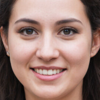

In [28]:
list_of_faces2 = facelist('https://raw.githubusercontent.com/marin-25/Facial-Expression-Classifier/9506adf66d0a9f7f308f75025f4a3add506d5411/Faces/fakerealpeople.JPG')

list_of_faces2[0]

In [ ]:
vvv